In [1]:
import re
import scipy.stats as stats
import math
import time
import matplotlib.pyplot as plt

In [99]:
import numpy as np
def pprob( x, temperature=1.0 ):
    return np.exp( -10*temperature*((x-2)**2) ) + 0.3*np.exp( -0.5*10*temperature*((x+1)**2) )

In [100]:
def qsample(x, stdev):
    """x is a vectors -> output is a sample from the q probability distribution"""
    return np.random.normal(x, stdev)

def qprob(x, y, stdev):
    """x and y are vectors -> output is the probability of x given a distr around y"""
    return stats.norm.pdf(x, y, stdev)

def take_samples(k, stdev):
    ones = np.ones(k)
    x = np.zeros(k)
    max_steps = 10000 # 10,000
    samples = np.zeros((max_steps, k))
    states = np.zeros((max_steps, k))
    for step in range(max_steps):
        states[step] = x
        xp = qsample(x, stdev)
        samples[step] = xp
        alpha = (pprob(xp) * qprob(x, xp, stdev)) / (pprob(x) * qprob(xp, x, stdev))
        r = np.minimum(alpha, ones)
        u = np.random.uniform(0, 1, k)
        x[u < r] = xp[u < r]
    return states, samples

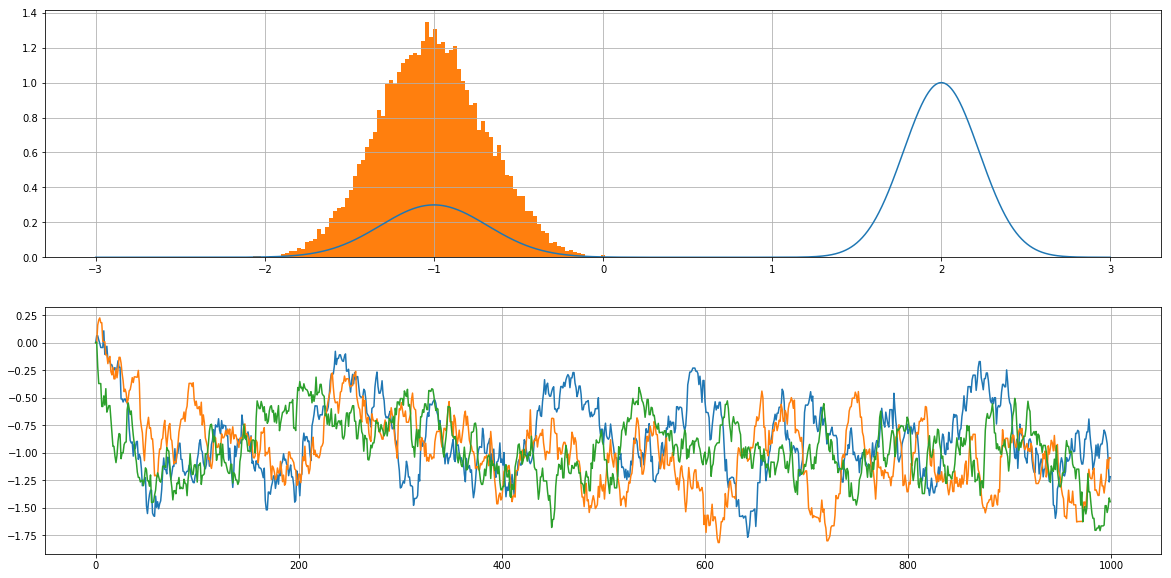

Acceptance Rate: 0.9007


In [102]:
stdev = 0.1
runs = 3
states, samples = take_samples(runs, stdev)
xs = np.arange(-3, 3, 0.001)
# graphs 1
ps = pprob(xs)
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xs, ps)
tot_states = np.reshape(states, states.shape[0] * states.shape[1])
axs[0].hist(tot_states, 100, normed=True)
for run in range(runs):
    axs[1].plot(states[:1000,run])
axs[0].grid()
axs[1].grid()
plt.show()

rate = 0.0
for run in range(runs):
    rate += np.unique(states[:,run]).shape[0]
print 'Acceptance Rate: {}'.format(rate/runs/states.shape[0])

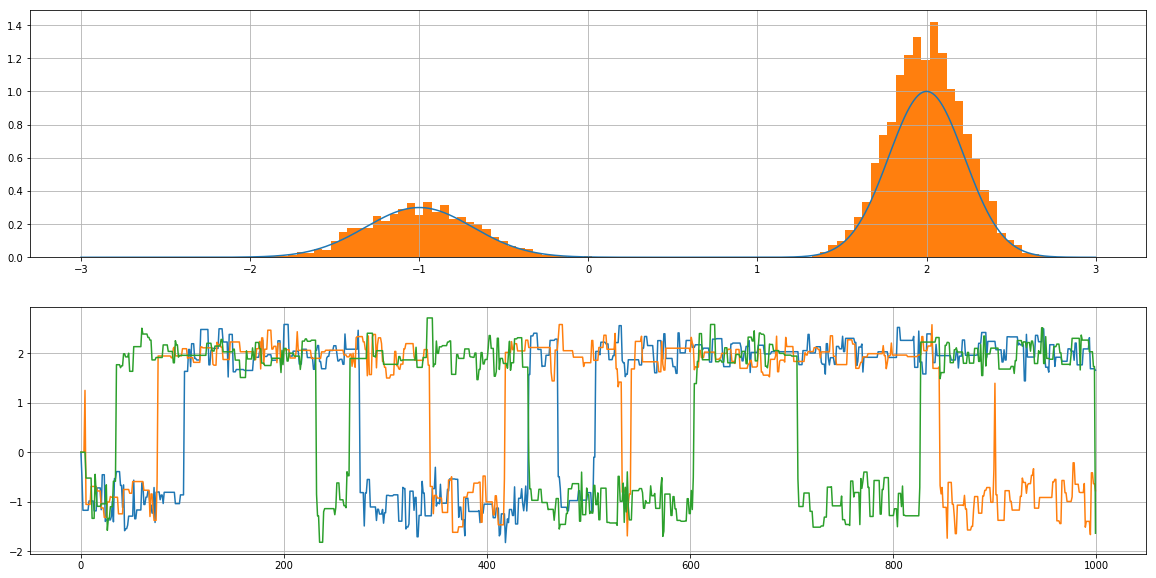

Acceptance Rate: 0.2966


In [103]:
stdev = 1.0
runs = 3
states, samples = take_samples(runs, stdev)
xs = np.arange(-3, 3, 0.001)
# graphs 1
ps = pprob(xs)
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xs, ps)
tot_states = np.reshape(states, states.shape[0] * states.shape[1])
axs[0].hist(tot_states, 100, normed=True)
for run in range(runs):
    axs[1].plot(states[:1000,run])
axs[0].grid()
axs[1].grid()
plt.show()

rate = 0.0
for run in range(runs):
    rate += np.unique(states[:,run]).shape[0]
print 'Acceptance Rate: {}'.format(rate/runs/states.shape[0])

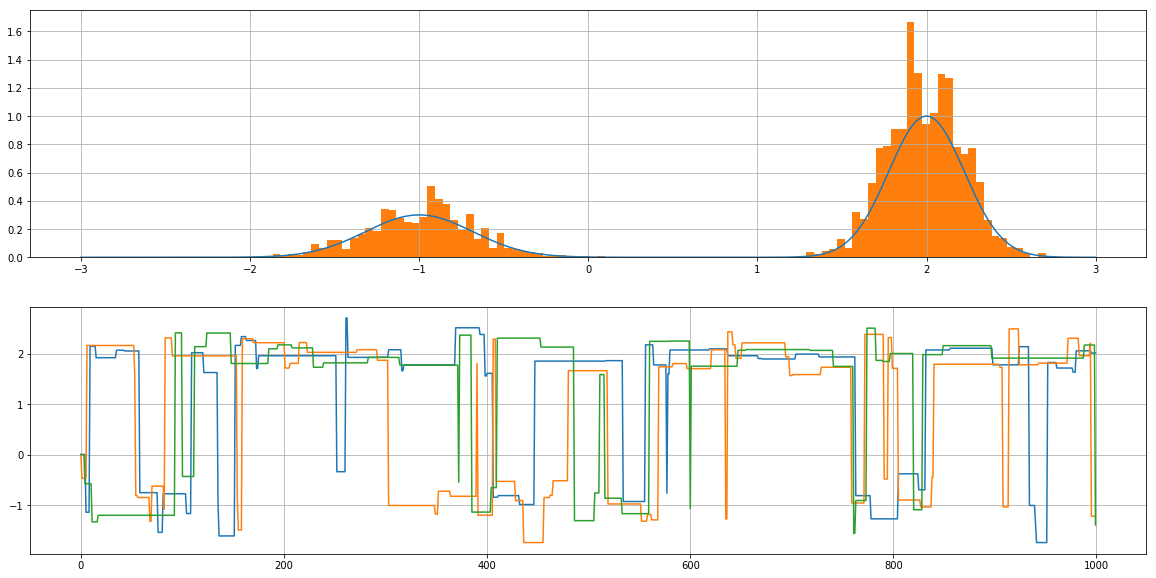

Acceptance Rate: 0.0559


In [104]:
stdev = 10.0
runs = 3
states, samples = take_samples(runs, stdev)
xs = np.arange(-3, 3, 0.001)
# graphs 1
ps = pprob(xs)
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xs, ps)
tot_states = np.reshape(states, states.shape[0] * states.shape[1])
axs[0].hist(tot_states, 100, normed=True)
for run in range(runs):
    axs[1].plot(states[:1000,run])
axs[0].grid()
axs[1].grid()
plt.show()

rate = 0.0
for run in range(runs):
    rate += np.unique(states[:,run]).shape[0]
print 'Acceptance Rate: {}'.format(rate/runs/states.shape[0])

In [108]:
from autograd import grad
import autograd.numpy as np
def pprob( x, temperature=1.0 ):
    return np.exp( -10*temperature*((x-2)**2) ) + 0.3*np.exp( -0.5*10*temperature*((x+1)**2) )

In [114]:
def U(x):
    return -1 * np.log(pprob(x))
#     return pprob(x)


grad_U = grad( U )
def hmc(L, epsilon, stdev):
    x = 0.0
    a_rate = 0.0
    max_steps = 10000 # 10,000
    states = np.zeros(max_steps)
    for step in range(max_steps):
#         print 'x: {}'.format(x)
        states[step] = x
        xp = x
        pp = qsample(x, stdev)
        p = pp
        current_U = U(x)
#         print 'p: {}'.format(p)
        current_K = np.power(p, 2) / 2

        # Make a half step for momentum at the beginning
        pp -= epsilon * grad_U(xp) / 2
        # Alternate full steps for position and momentum
        for i in range(1, L):
            # Make a full step for the position
            xp += epsilon * pp
            # Make a full step for the momentum, except at end of trajectory
            if i < L-1:
                pp -= epsilon * grad_U(xp)

        # Make a half step for momentum at the end.
        pp -= epsilon * grad_U(xp) / 2
        # Negate momentum at end of trajectory to make the proposal symmetric
        pp *= -1
        # Evaluate potential and kinetic energies at start and end of trajectory
        current_K = np.power(p, 2) / 2
        proposed_U = U(xp)
        proposed_K = np.power(pp, 2) / 2
        if np.random.uniform(0, 1) < np.exp(current_U-proposed_U+current_K-proposed_K):
            x = xp
            a_rate += 1.0
    return states, a_rate / max_steps

Acceptance Rate: 0.9981


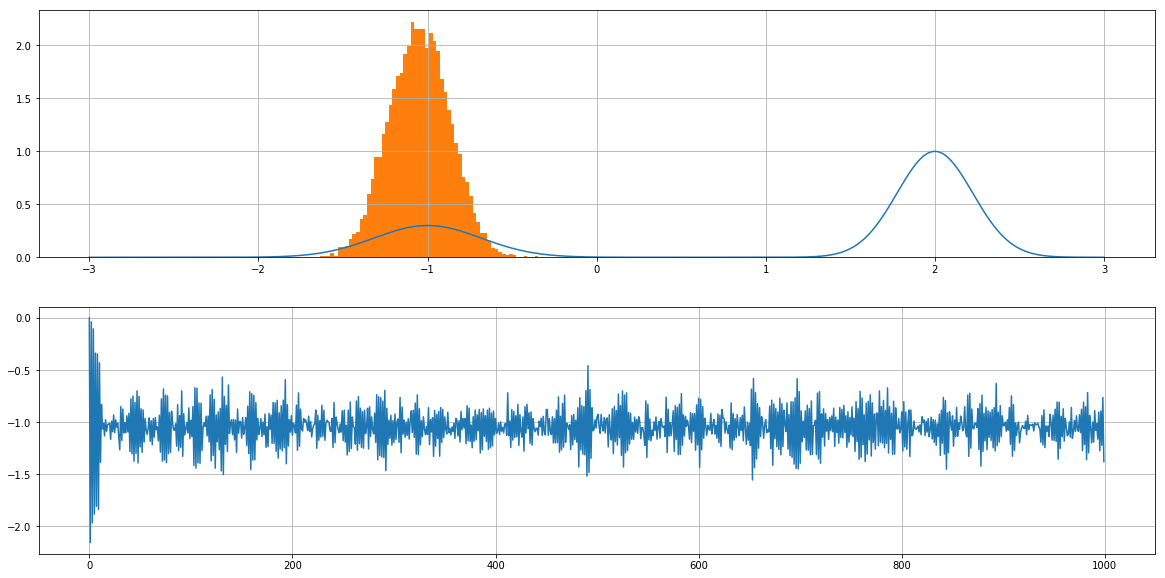

In [134]:
# graphs 2
epsilon = 0.1
L = 10
stdev = 1.0
states, a_rate = hmc(L, epsilon, stdev)
print 'Acceptance Rate: {}'.format(a_rate)

ps = pprob(xs)
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xs, ps)
axs[0].hist(states, 100, normed=True)
axs[1].plot(states[:1000])

axs[0].grid()
axs[1].grid()
plt.show()

Acceptance Rate: 0.8702


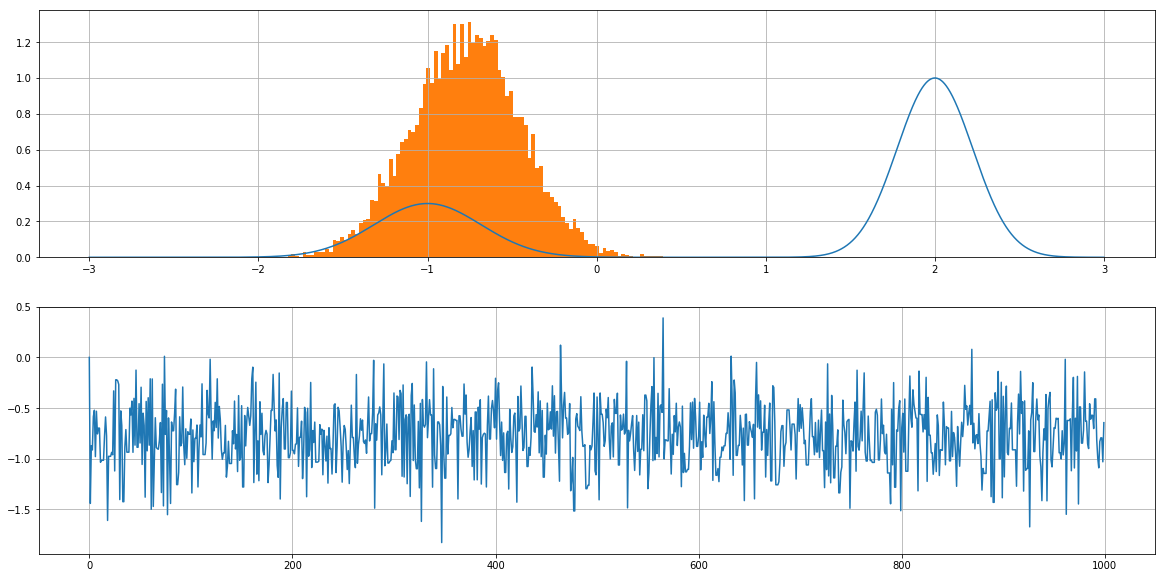

In [133]:
epsilon = 0.3
L = 25
stdev = 1.0
states, a_rate = hmc(L, epsilon, stdev)
print 'Acceptance Rate: {}'.format(a_rate)

ps = pprob(xs)
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xs, ps)
axs[0].hist(states, 100, normed=True)
axs[1].plot(states[:1000])

axs[0].grid()
axs[1].grid()
plt.show()

Acceptance Rate: 0.5949


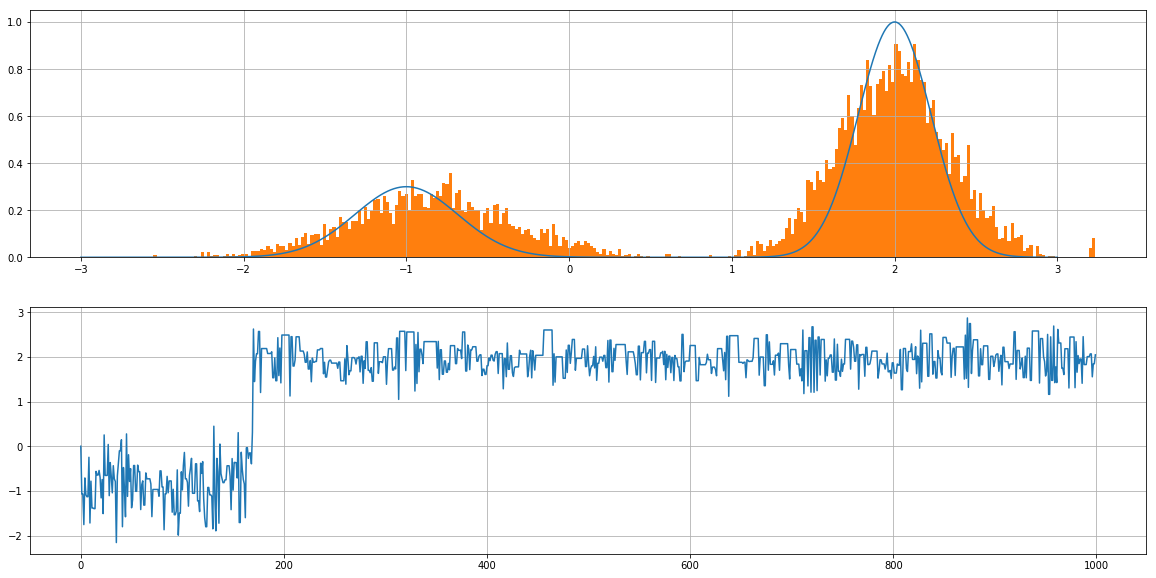

In [129]:
epsilon = 0.3
L = 25
stdev = 2.0
states, a_rate = hmc(L, epsilon, stdev)
print 'Acceptance Rate: {}'.format(a_rate)

ps = pprob(xs)
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xs, ps)
axs[0].hist(states, 300, normed=True)
axs[1].plot(states[:1000])

axs[0].grid()
axs[1].grid()
plt.show()

Acceptance Rate: 0.5722


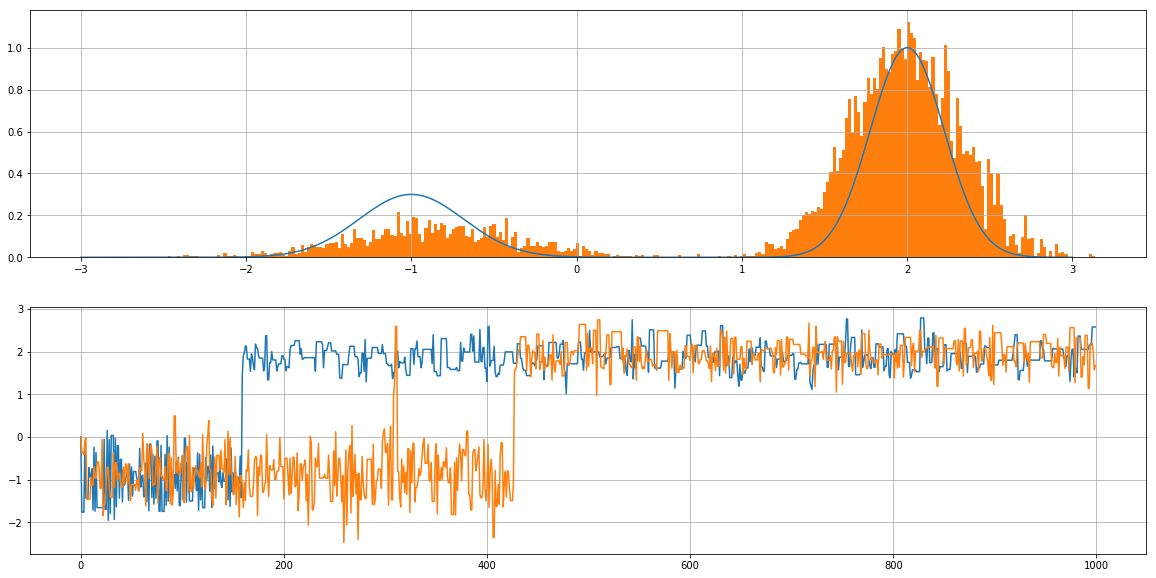

In [131]:
epsilon = 0.3
L = 25
stdev = 2.0
states2, a_rate = hmc(L, epsilon, stdev)
print 'Acceptance Rate: {}'.format(a_rate)

ps = pprob(xs)
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xs, ps)
axs[0].hist(states2, 300, normed=True)
axs[1].plot(states[:1000])
axs[1].plot(states2[:1000])

axs[0].grid()
axs[1].grid()
plt.show()

Acceptance Rate: 0.5668


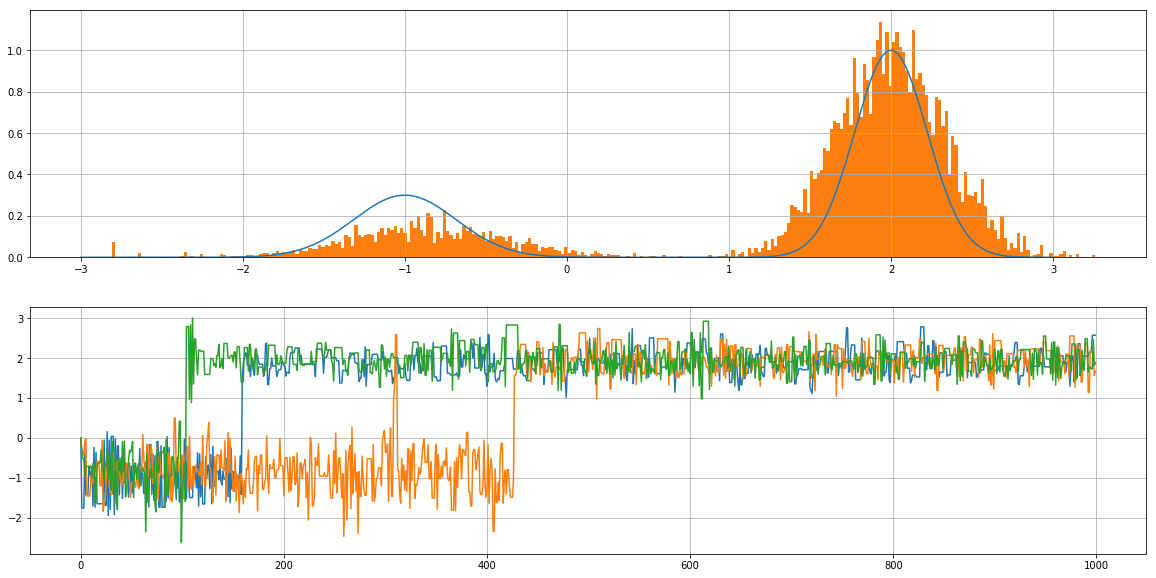

In [132]:
epsilon = 0.3
L = 25
stdev = 2.0
states3, a_rate = hmc(L, epsilon, stdev)
print 'Acceptance Rate: {}'.format(a_rate)

ps = pprob(xs)
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xs, ps)
axs[0].hist(states3, 300, normed=True)
axs[1].plot(states[:1000])
axs[1].plot(states2[:1000])
axs[1].plot(states3[:1000])

axs[0].grid()
axs[1].grid()
plt.show()

In [136]:
# Part 3
"""
1. What was the acceptance rate of each algorithm? (ie, what percentage of proposals were accepted)
2. Why don't some inference algorithms explore both modes of the density?
3. Why do some algorithms stay in the same state repeatedly? Is this good or bad?
4. What were the best values for the variance of the momentum variables and the timestep you found? 
    How did you know that they were good?

1. Interestingly, in the results I got for both the MH-MC and the HMC, the lower the acceptance rate the better 
    the states were.  The best results I got for MH-MC were with a stdev of 1.0, and that had an acceptance rate
    of 29.66%.  The best results for HMC got an acceptance rate of 56-59%.  
2. The problem that HMC has with overcoming the bimodal problem is that it uses just the momentum term to 
    get to other places in the distribution.  This works for the most part, but struggles when there are 
    areas of really low probability because it has to have enough momentum to get over that.  The density 
    modes just aren't connected enough for the inference algorithm to get there.
3. If the algorithm stays in the same place repeatedly it either means that it can't find a good place to go,
    or that the place where it's at is really good and it's hard to find somewhere better.  The latter case
    is a feature, not a flaw, since it allows more sampling from an area of high probability.  
4. The best I found was L=25, stdev=2.0, epsilon=0.3.  I know that these hyperparameters are good 
    because the histogram matches the plotted functiono rather well.  The hyperparameters that we were supposed
    to work with were just the L and epsilon, but I found if I just tweaked the stdev the HMC was able to get over
    the region of low probability.  Admittedly it got stuck there, but it still worked well.  
"""
i = 0